In [1]:
import pandas as pd
data=pd.read_csv('data/wine_cleared.zip')

РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [2]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32


РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья Python RegEx: практическое применение регулярок.

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

✍️ Выполните код для нахождения года вина при помощи регулярного выражения:

In [3]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013


РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [4]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0


Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [5]:
pd.DataFrame(data['country'].value_counts(ascending=False)).iloc[:3,:]

,count
country,
US,54504
France,22093
Italy,19540


Возможно, производство вина в этих странах также влияет на рейтинг. Давайте создадим для них бинарные признаки.

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

В ответ впишите результат выполнения кода data['is_france'].sum():

In [6]:
data['is_france']=data['country'].apply(lambda x: 1 if x=='France' else 0)
data['is_italy']=data['country'].apply(lambda x: 1 if x=='Italy' else 0)
display(data['is_france'].sum())
data['is_italy'].sum()

22093

19540

Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

In [7]:
data['old_wine']=data['year'].apply(lambda x: 1 if float(x)<2010 else 0)
data['old_wine'].sum()

39781

или


In [8]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
#data['old_wine'].sum()
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0


Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [9]:
data['locality']=data['title'].apply(lambda x: (x.split()[-1])[1:-1])
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna


ИЛИ

In [10]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna


РАБОТА С ФАЙЛАМИ

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [11]:
import pandas as pd
country_population = pd.read_csv('data\country_population.zip', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

In [12]:
country_population[country_population['country']=='Italy']['population']

24    59,097,904
Name: population, dtype: object

Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [13]:
data=data.join(country_population.set_index('country'), on='country')
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"


 Теперь используем файл country_area.zip (необходимо распаковать) для информации о площади страны.

Прочитаем файл:

In [14]:
country_area = pd.read_csv('data\country_area.zip', sep=';')
country_area.head(2)

,country,area
0,Russia,17075400.0
1,Canada,9984670.0


Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [15]:
country_area=country_area.rename(columns={'area':'area_country'})
data=data.join(country_area.set_index('country'), on='country')
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0


In [16]:
mask=data['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
round(data[mask]['area_country'])

94    9372610.0
Name: area_country, dtype: float64

---
Создание признаков. Работа с форматом «дата-время»
текущий урок

Мы рассмотрели самые популярные идеи для создания признаков из даты, но вы можете придумать гораздо больше вариантов, так как генерация признаков — это очень творческий процесс, ограниченный только фантазией и временем автора.

✍️ Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:


client_id — идентификатор клиента в базе;

agent_date — время соединения с агентом;

created_at — время соединения с клиентом (начало разговора);

end_date — время окончания соединения с клиентом (конец разговора).

Прочитаем данные:

In [17]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]
calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. Давайте создадим несколько признаков из этих данных.

Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 

Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [18]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Таким образом мы получили новый признак duration — длительность разговора в секундах.

Давайте создадим ещё несколько признаков на основе существующих.

---


Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [19]:
calls['time_connection']=(calls['created_at']-calls['agent_date']).dt.seconds
display(calls['time_connection'].sum())
calls.head(2)

89

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2


Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [20]:
calls['is_connection']=calls['duration'].apply(lambda x:1 if x>10 else 0)
display(calls['is_connection'].sum())
calls.head(2)

7

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1


Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [21]:
calls['time_diff']=(calls['end_date']-calls['agent_date']).dt.seconds
display(calls['time_diff'].sum())
calls.head(2)

1144

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233


Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [22]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Итоговый набор данных включает в себя колонки client_id, duration, time_connection, is_connection, time_diff. После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому вы научитесь далее в юните про отбор признаков.

Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

В следующем юните вы познакомитесь с кодированием признаков. А сейчас предлагаем вам ответить на несколько вопросов для закрепления материала. ⬇️

---
'''
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:

data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

Подробнее о назначении этого параметра вы можете прочесть в документации.'''

Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.

Для лучшего усвоения материала предлагаем вам повторить типы категориальных признаков в ранее пройденном модуле PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category.

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 

Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

Установим библиотеку:

In [23]:
#pip install category_encoders

Импортируем библиотеку category-encoders для дальнейшего использования. 

In [24]:
import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

порядковое кодирование (Ordinal Encoding); 
однократное кодирование (OneHot Encoding); 
бинарное кодирование (Binary Encoding).
Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где 

size — буквенное обозначение размера одежды, 

type — тип изделия

In [25]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [26]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

---
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.


In [27]:
#решение универсальное
'''import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)
data.head(2)'''

"import category_encoders as ce\n\nord_encoder = ce.OrdinalEncoder()\nyear_col = ord_encoder.fit_transform(data['year'])\ndata = pd.concat([data, year_col], axis=1)\ndata.head(2)"

In [28]:
data['year']=data['year'].astype('string')
regex='\d{4}'
data['year']=data['year'].str.findall(regex).str.get(0)
data['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129972, dtype: object

ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

На рисунке изображено кодирование колонки color со значениями red, green, blue. Для каждого значения создаётся новый бинарный признак: red -> color_red, blue -> color_blue, green -> color_green, и проставляются значения исходного признака. 

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

В нашем примере с признаком color мы получили три новых признака color_red color_blue, color_green. Но представьте, что в наборе данных у нас попадётся признак с большим количеством категорий.

Пример 

Компания, выпускающая аромасвечи, решила узнать, влияет ли регион клиента на выбор их продукции. Признак регион является номинальным, и по правилам блок-схемы мы должны закодировать его однократным кодированием. Таким образом, кодирование признака регион даст нам 84 дополнительных признака для модели. Это может привести к серьёзным проблемам с памятью на наборах с большим количеством строк. 

Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Результат кодирования будет выглядеть так: 

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/7df1488524d85078f417757671d89476/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-3-12.png)
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/e7adfe06720be4688a3c1bf9a477e3f4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-3-13.png)

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [29]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

---

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

In [30]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [31]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['taster_name'],use_cat_names=True)
type_bin=encoder.fit_transform(data['taster_name'])
data=pd.concat([data,type_bin],axis=1)

display(len(set(data['taster_name'].value_counts())))
data.head(2)

20

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


---

ДВОИЧНОЕ КОДИРОВАНИЕ

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/257600c912d08d49d9c9f7e6e6c02f6c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-3-14.png)

Источник: towardsdatascience.com

Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

Пошаговый алгоритм двоичного кодирования можно описать так: 

значения признака кодируются в некоторый числовой порядок;

целые числа кодируются в двоичный код;

цифры двоичного представления формируют новые столбцы.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [32]:
clothing=clothing.drop(['type_dress','type_skirt','type_shirt','type_coat'],axis=1)
#удаляем столбцы после прошлого задания

In [33]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_0,type_1,type_2
0,xxs,dress,1,0,0,1
1,xxs,skirt,1,0,1,0
2,xs,dress,2,0,0,1
3,s,skirt,3,0,1,0
4,m,dress,4,0,0,1
5,l,shirt,5,0,1,1
6,s,coat,3,1,0,0
7,m,coat,4,1,0,0
8,xxl,shirt,6,0,1,1
9,l,dress,5,0,0,1


Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.

In [34]:
data=pd.read_csv('data\wine_cleared.zip')

import category_encoders as ce

bin_encoder=ce.BinaryEncoder(cols=['country'])
type_bin=bin_encoder.fit_transform(data['country'])
data=pd.concat([data,type_bin],axis=1)
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,0,0,0,1,0


На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [35]:
bin_encoder=ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin=bin_encoder.fit_transform(data['taster_twitter_handle'])
display(len(type_bin.columns))
data=pd.concat([data,type_bin],axis=1)
data

5

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


Используйте следующий датафрейм для задания:

Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [36]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

import category_encoders as ce

bin_encoder=ce.BinaryEncoder(cols=['product'])
type_bin=bin_encoder.fit_transform(df['product'])
df=pd.concat([df,type_bin],axis=1)

encoder=ce.OneHotEncoder(cols=['payment_type'])
type_bin=encoder.fit_transform(df['payment_type'])
df=pd.concat([df,type_bin],axis=1)

df

,product,price,payment_type,product_0,product_1,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,0,1,1,0,0
1,Product2,3600,Visa,1,0,0,1,0
2,Product3,7500,Amex,1,1,0,0,1


In [37]:
minutes=[1,2,3,4]
hours=list(map(lambda x:x*3,minutes))
hours

[3, 6, 9, 12]

 Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация, которые мы рассмотрим в этом юните.

Примечание. Операции нормализации и стандартизации также часто называют шкалированием. 

Проблема

Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

Рассмотрим такие преобразования, как нормализация и стандартизация.

НОРМАЛИЗАЦИЯ

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

✏️ Попробуем на обучающем примере применить различные способы нормализации к распределениям и увидеть разницу между ними.

Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [38]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
df.describe(include='all')

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
Нормальное распределение, например распределение роста и веса человека.
Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

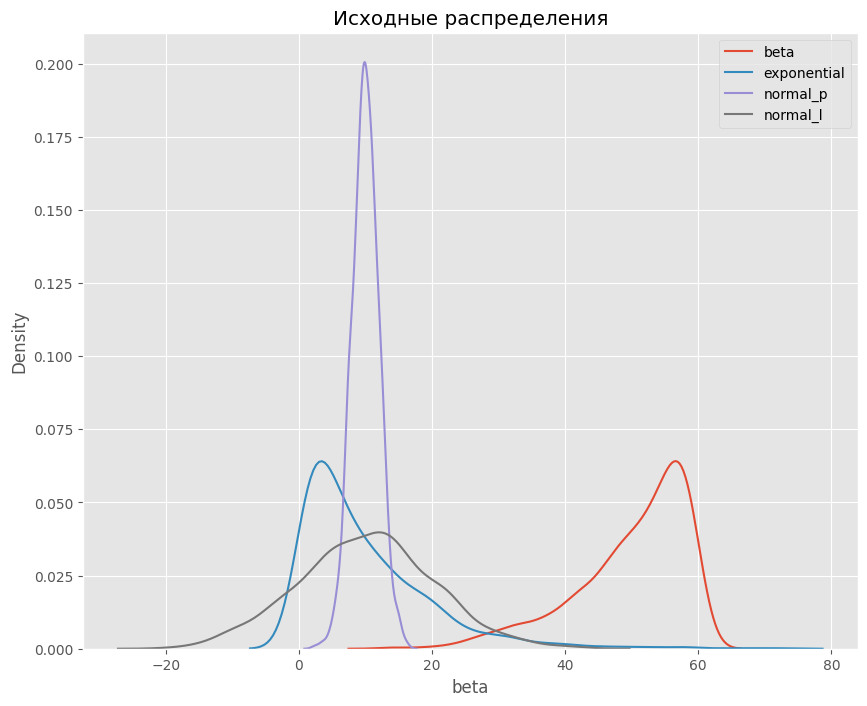

In [39]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

Зафиксируем описательные статистики до преобразований.

In [40]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

Из каждого значения признака х вычитается минимальное значение этого признака:  

Результат вычитания делится на разность между максимумом и минимумом признака: 

Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов. 

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

Проведём нормализацию распределений признаков из обучающего примера.

Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

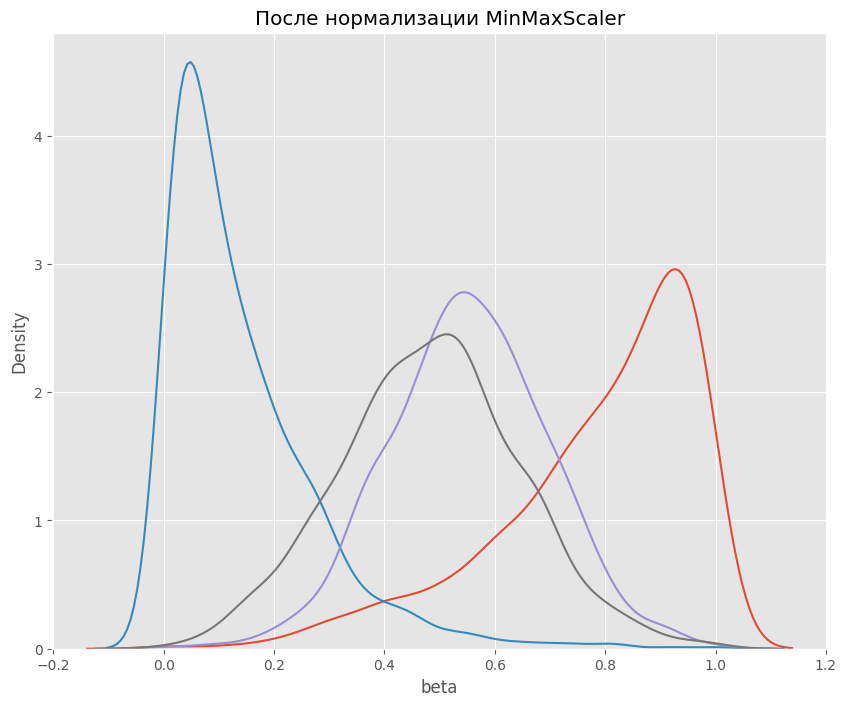

In [41]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [42]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

Теперь рассмотрим нормализацию методом RobustScaler, а затем сравним их.

ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

из каждого значения признака вычитается медиана признака

полученное значение делится на межквартильный размах:

Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: . Мы хотим нормализовать число 4.

Таким образом, значение 4 после нормализации приняло значение 0.5.

Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

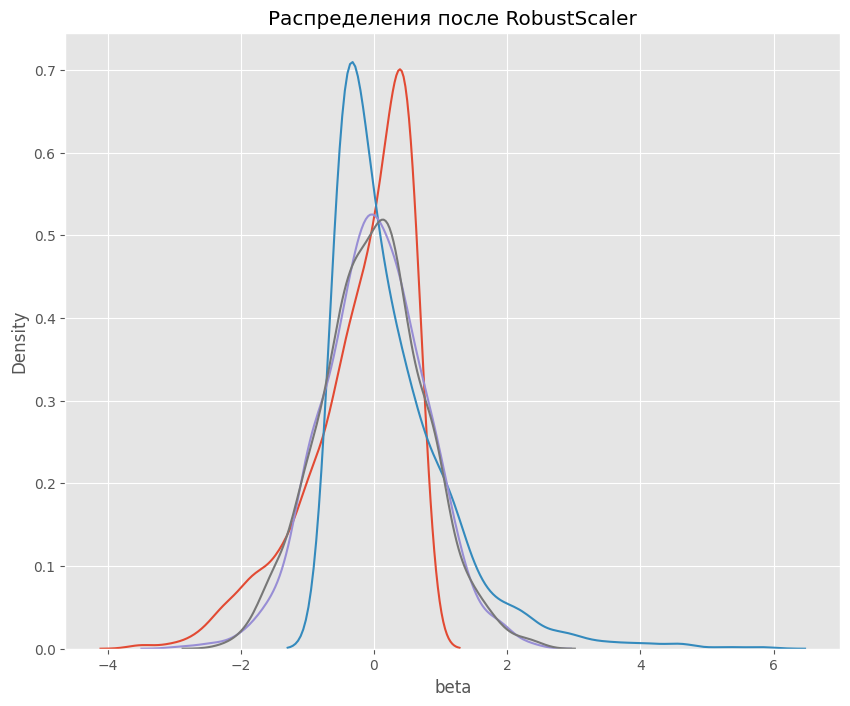

In [43]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [44]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

В ЧЁМ РАЗНИЦА?

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

Больше о других способах нормализации и их сравнении вы можете прочитать в официальном руководстве scikit-learn.

---

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

Больше о других способах нормализации и их сравнении вы можете прочитать в официальном руководстве scikit-learn.

СТАНДАРТИЗАЦИЯ 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

Например, у нас есть числовой ряд [1, 2, 3, 4, 5]. Среднее ряда: 3. Стандартное отклонение — 1.4. Нормализуем число 4.

Нормализованное число 4 равно 0.7.

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ?

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.

STANDARDSCALER

Для стандартизации используем класс StandardScaler.

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

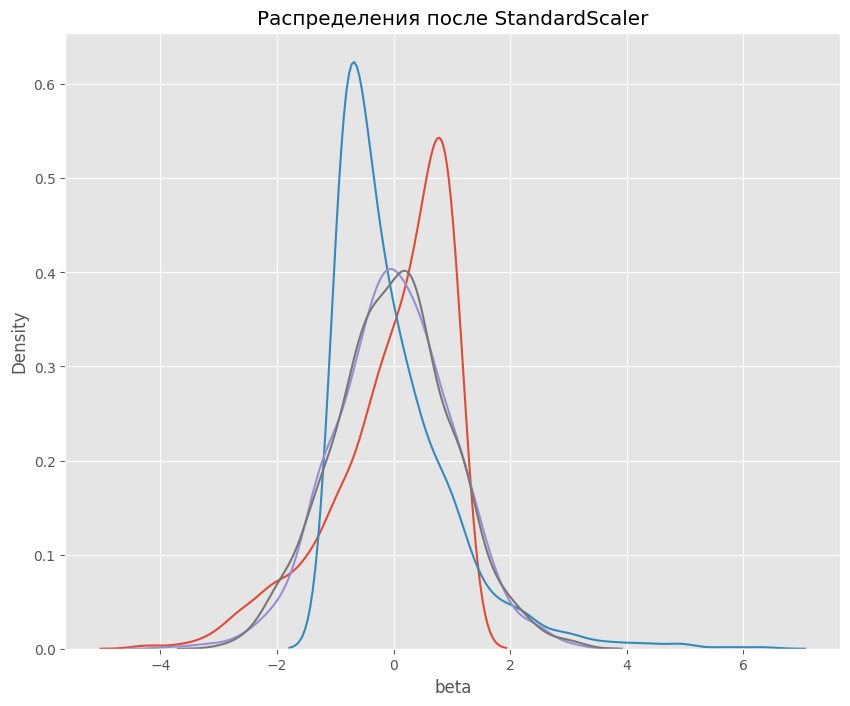

In [45]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

О нормальном распределении мы говорили в юните про корреляцию.

НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

?Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать? 

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую инструкцию по преобразованию признаков:

если признак распределён нормально, то его необходимо стандартизировать;
если признак распределён ненормально, его необходимо нормализовать;
если разброс значений небольшой, то можно обойтись без преобразования данных.
Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому пробуйте делать различные преобразования и оценивайте результаты на конкретной модели, смотрите, есть ли разница в улучшении качества модели. О том, как сравнивать модели, вы узнаете далее в курсе в модулях про машинное обучение.

?Что лучше? Нормализовать, а потом стандартизировать или наоборот?

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.


Подсказка (1 из 1): Признак price не был подвергнут обработке выбросов, и распределение сильно смещено влево из-за высоких цен на некоторые вина. Используйте RobustScaler для нормализации признака.

In [46]:
data_for_s=pd.DataFrame(data['price'])

43501

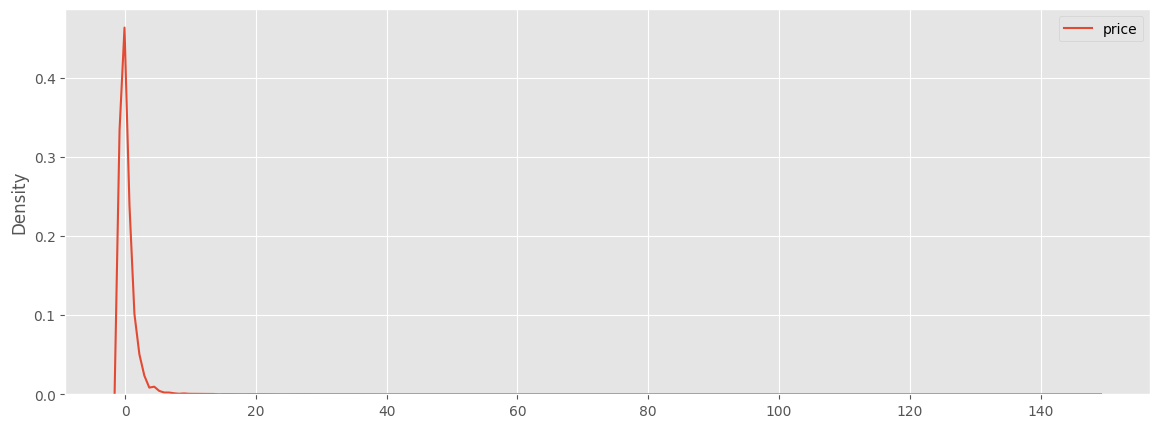

In [47]:
s_scaler=preprocessing.RobustScaler()

data_s=s_scaler.fit_transform(data_for_s)
data_s=pd.DataFrame(data_s,columns=['price'])
fig,ax1=plt.subplots(ncols=1,figsize=(14,5))
sns.kdeplot(data_s,ax=ax1)
round(data_s['price'].sum())

Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

-0.14

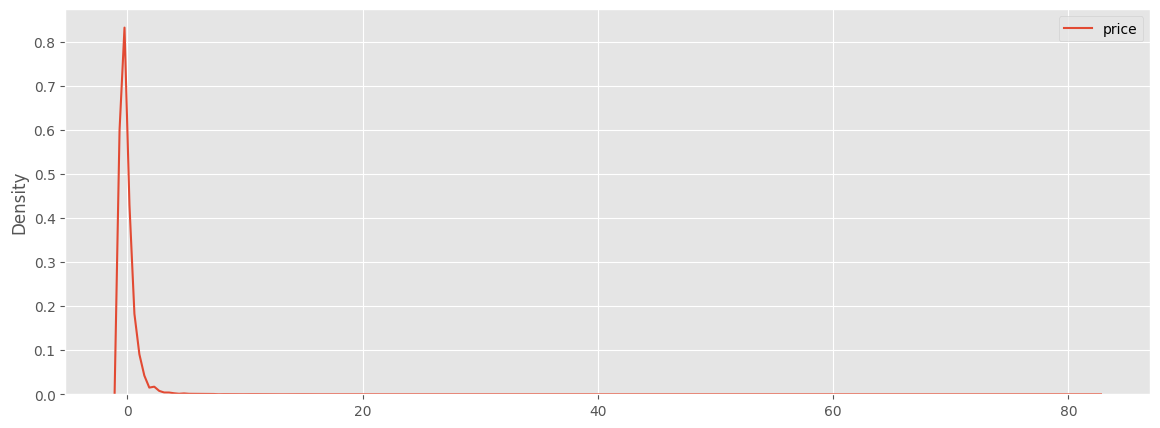

In [48]:
s_scaler=preprocessing.StandardScaler()

data_s=s_scaler.fit_transform(data_for_s)
data_s=pd.DataFrame(data_s,columns=['price'])
fig,ax1=plt.subplots(ncols=1,figsize=(14,5))
sns.kdeplot(data_s,ax=ax1)
round(data_s['price'][129968],2)

 Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является отбор признаков.

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Например, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?

Отбор признаков помогает:

1Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

КАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ?

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как значимость, критерий значимости, гипотеза. С этими понятиями вы познакомитесь в следующем модуле про выдвижение гипотез. 

Однако есть и ещё один способ отобрать признаки для обучения — корреляция, которую вы изучили в модуле EDA-2. Математическая статистика в контексте EDA Юнит 3. Корреляция.

В этом юните мы рассмотрим такое понятие, как мультиколлинеарность и её связь с отбором признаков.

Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Некоторые модели плохо работают на данных с мультиколлинеарностью. Вы узнаете об этом позже в модулях про машинное обучение.

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

⬇️ Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

sepal length — длина наружной доли околоцветника;
sepal width — ширина наружной доли околоцветника;
petal length — длина внутренней доли околоцветника;
petal width — ширина внутренней доли околоцветника.
✍️ На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

Прочитаем датасет и посмотрим на первые несколько строк.

In [49]:
import pandas as pd

iris = pd.read_csv('data\iris.zip')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

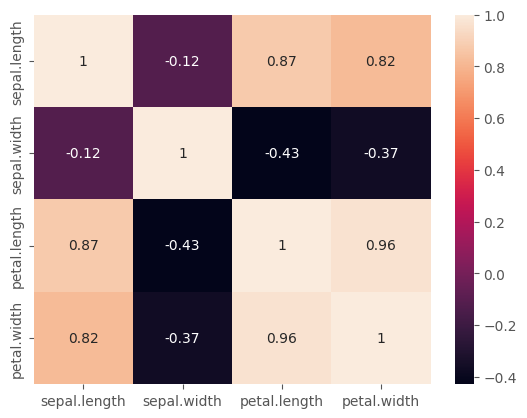

In [50]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [51]:
iris = iris.drop(['petal.width'], axis=1)

Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

In [52]:
iris = iris.drop(['petal.length'], axis=1)
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

Подсказка (1 из 2): Постройте тепловую матрицу корреляций для всех признаков. Найдите самые сильно скоррелированные пары. Удалите из этих пар по одному признаку.
Подсказка (2 из 2): Сильно скорелированные признаки — это признаки с коэффициентом корреляции +/-0.7 и выше.

<Axes: >

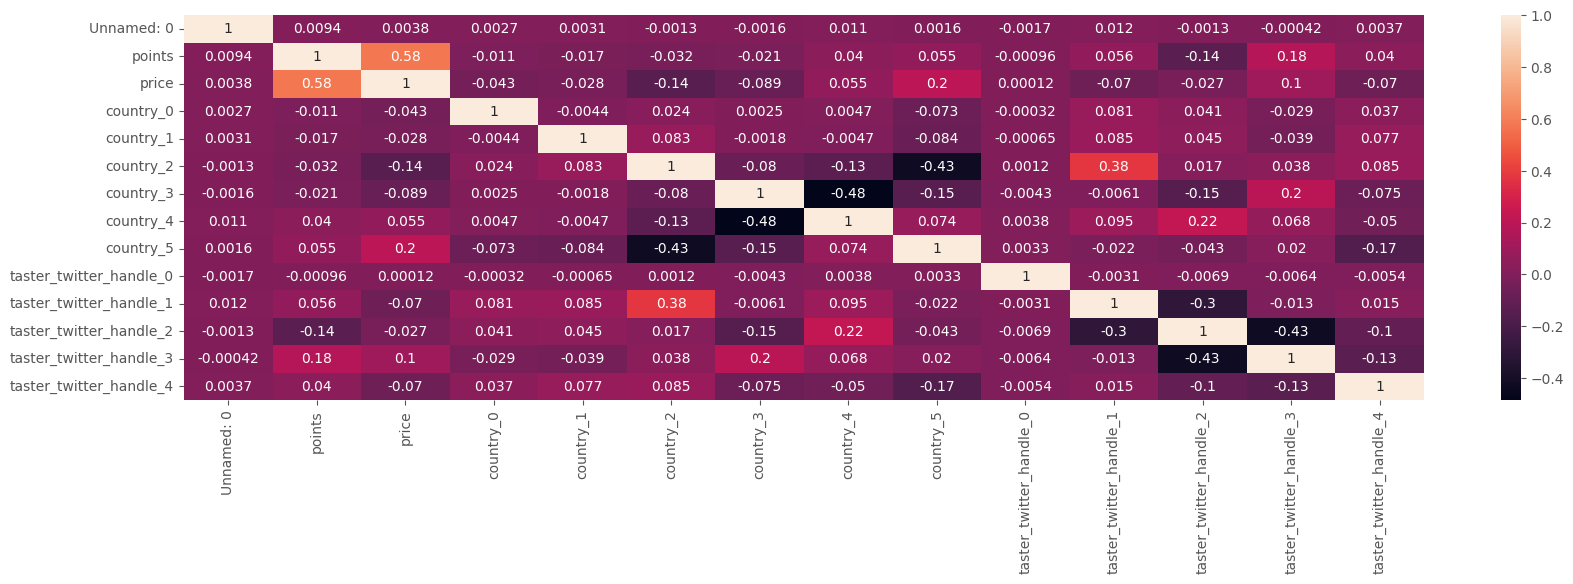

In [53]:
quest=data.copy()
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(20,5))
sns.heatmap(quest.corr(method='spearman',numeric_only=True),annot=True,ax=ax)

---

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст

sex — пол (1 - мужчина, 0 - женщина)

cp — тип боли в груди (4 значения)

trestbps — артериальное давление в покое

chol — холестерин сыворотки в мг/дл

fbs — уровень сахара в крови натощак > 120 мг/дл

restecg — результаты электрокардиографии в покое (значения 0,1,2)

thalach — достигнута максимальная частота сердечных сокращений

exang — стенокардия, вызванная физической нагрузкой

oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

slope — наклон пикового сегмента ST при нагрузке

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [54]:
import pandas as pd
heart=pd.read_csv('data\heart.zip')
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum()

In [55]:
heart['old']=heart['age'].apply(lambda x: 1 if x>60 else 0)
display(heart['old'].sum())
heart.head(2)

79

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0


Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

sex — пол (1 - мужчина, 0 - женщина)

Возраст (лет)	Мужчины	Женщины

до 20	        123/76	116/72

21-30	126/79	120/75

31-40	129/81	127/80

41-50	135/83	137/84

51-60	142/85	144/85

61 и старше	142/80	159/85

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [56]:
def function_norm(sex:int,age:int)->int:
    '''
    Функция принимает:
        sex (1-мужчина, 0-женщина);
        age (возраст)
    '''
    if sex==1:
        if age<=20:
            return 123
        elif 21<=age<=30:
            return 126
        elif 31<=age<=40:
            return 129
        elif 41<=age<=50:
            return 135
        elif 51<=age<=60:
            return 142
        elif 61<=age:
            return 142
    elif sex==0:
        if age<=20:
            return 116
        elif 21<=age<=30:
            return 120
        elif 31<=age<=40:
            return 127
        elif 41<=age<=50:
            return 137
        elif 51<=age<=60:
            return 144
        elif 61<=age:
            return 144

heart['trestbps_mean']=heart.apply(lambda x: function_norm(x['sex'],x['age']),axis=1)
display(heart.iloc[300,-1])
heart.head(2)

142

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129


Проанализируйте датасет и выберите категориальные признаки.

cp

restecg

slope

ca

thal

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [57]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal'],use_cat_names=True)
type_bin=encoder.fit_transform(heart[['cp','restecg','slope','ca','thal']])
heart=heart.drop(['cp','restecg','slope','ca','thal'],axis=1) #использовать лишь раз
new_heart=pd.concat([heart,type_bin],axis=1)

In [58]:
new_heart.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0


Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [59]:
mm_scaler=preprocessing.RobustScaler()
col_names=new_heart.columns
heart_mm=mm_scaler.fit_transform(new_heart)
heart_mm=pd.DataFrame(heart_mm,columns=col_names)

round(heart_mm.describe().loc['std','chol'],6)

0.816232

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

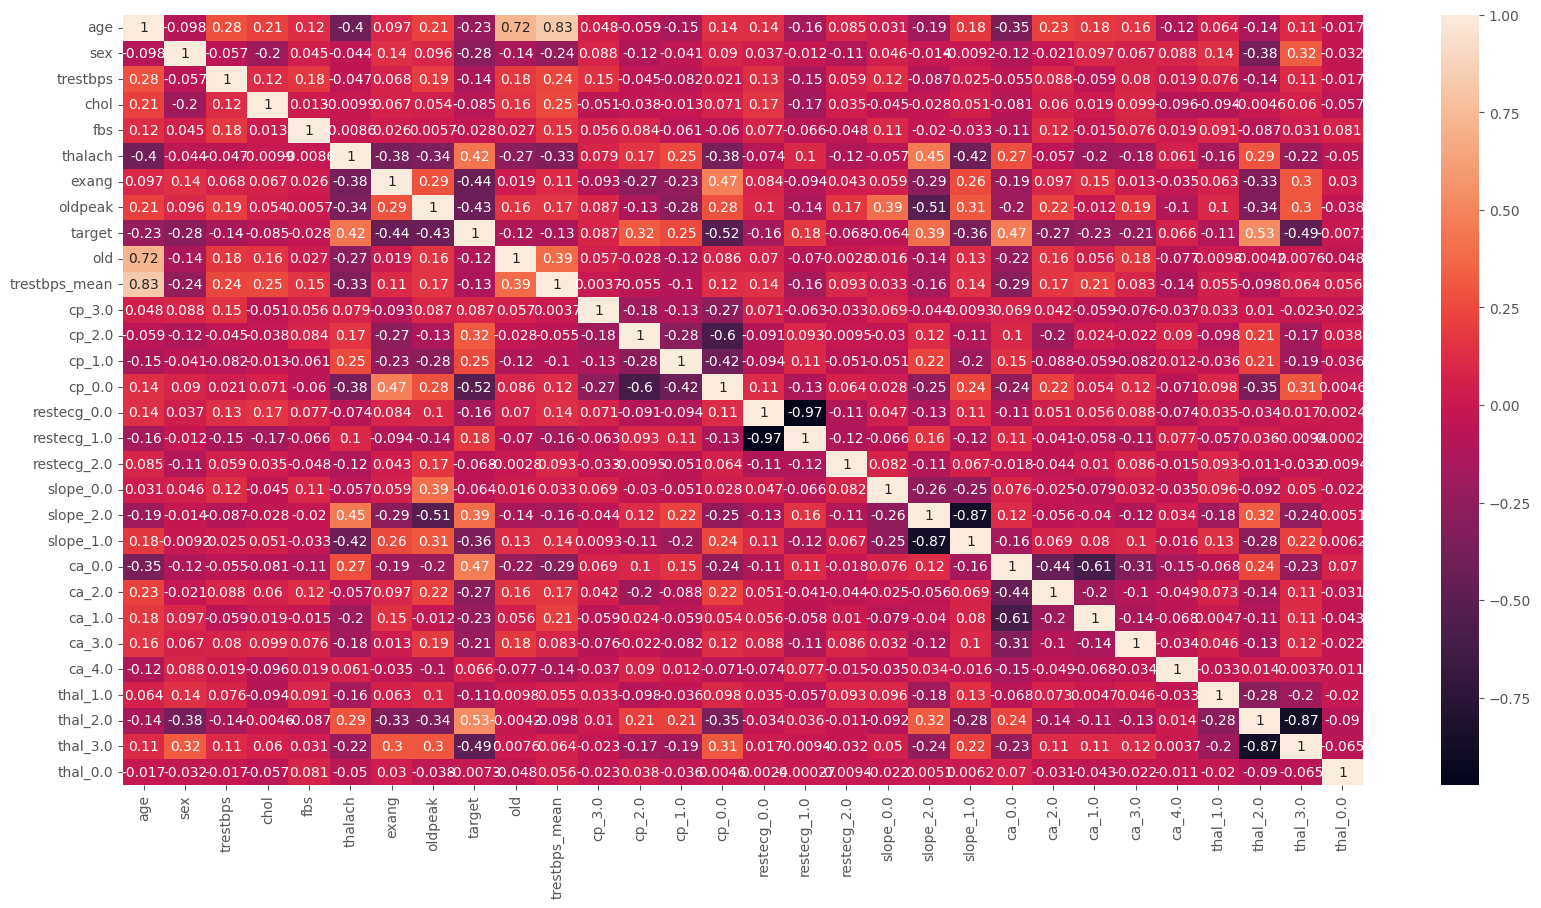

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax1=plt.subplots(ncols=1,nrows=1,figsize=(20,10))
sns.heatmap(heart_mm.corr(),annot=True,ax=ax1)

---

 Проверка на нормальность

 В предыдущем юните мы говорили, что для выбора между параметрическими и непараметрическими тестами необходимо проверить распределение признаков на нормальность. Сейчас мы узнаем, что такое нормальное распределение, почему оно так важно для нас и как проверить, подчиняется ли распределение данных нормальному закону.

Начиная с этого раздела, мы будем практиковаться на Python. Для этого нам понадобятся две новых библиотеки:

SciPy — библиотека для научных и инженерных расчётов.
Statsmodels — библиотека для статистических исследований.
Установить эти библиотеки можно с помощью стандартной команды:

! pip install scipy
! pip install statsmodels
НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Многие процессы в природе следуют нормальному закону распределения: рост человека, вес при рождении, артериальное давление, размер ноги и др.

На курсе вы уже сталкивались с понятием нормального распределения и некоторыми теоремами и правилами, основанными на особенностях нормального распределения. В частности в модуле «Очистка данных» мы изучали метод z-отклонений (трёх сигм) и метод Тьюки для поиска выбросов — они работают только для нормально распределённых данных.

Нормальное распределение (распределение Гаусса) характеризуется двумя числами:

средним значением  (mu);
стандартным отклонением  (sigma).
Примеры нормальных распределений с разными  и :

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/3d9c79fc492d3c412cddce4f5c36a02e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/DST_EDA_4_6_1.png)

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

Один пик в центре и симметричные боковые стороны (одномодальное распределение).
Среднее и медиана равны и расположены в центре распределения.
Отклонение значений от среднего подчиняется правилу трёх сигм:
68 % значений находятся в пределах одного стандартного отклонения от среднего;
95 % значений — в пределах двух стандартных отклонений;
99.7% значений — в пределах трёх стандартных отклонений.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d06f1b5b368db56a94080ad7bc31ece6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/DST_EDA_4_6_2.png)

ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

ГИСТОГРАММА

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/70ab0b9089303b0cb7f101d5536f3b6c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/DST_EDA_4_6_3.png)

Напомним, что в Python гистограмму можно построить с помощью функции histplot() пакета seaborn. Параметр kde=True добавляет к гистограмме график оценки плотности ядра.

Рассмотрим эту функцию на примере датасета California Housing, входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

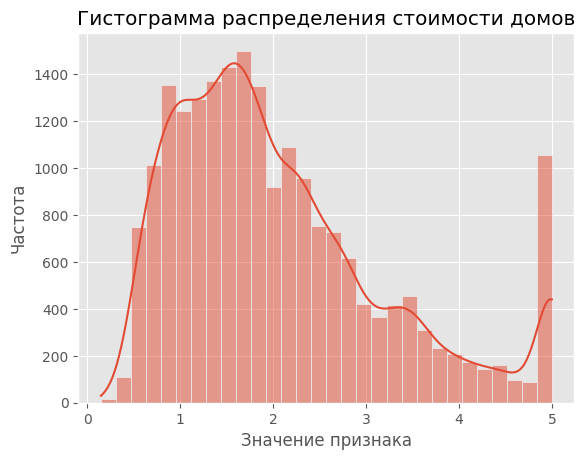

In [61]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по Q-Q Plots.

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f08c932f36f4e95fcf39366c33fe9494/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/DST_EDA_4_6_5.png)

В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

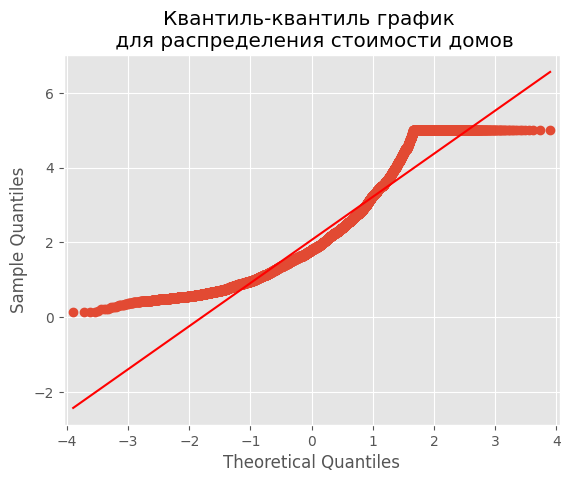

In [62]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод — тест Шапиро — Уилка.

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

Нулевая: данные распределены нормально.
Альтернативная: данные не распределены нормально.
Детали расчёта p-value в тесте Шапиро — Уилка.

Если p-value теста больше уровня значимости , то мы считаем, что данные распределены нормально.

ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [63]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Мы рассмотрели графические и статистические методы проверки на нормальность. Их можно использовать как вместе, так и по отдельности.

Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, тест Д’Агостино или тест Колмогорова — Смирнова. У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. Ещё больше способов проверки на нормальность.

Ранее мы говорили, что для нормально распределённых данных можно использовать параметрические тесты. Теперь мы умеем проверять, является ли распределение нормальным, а значит, настало время обсудить параметрические тесты. Но прежде давайте закрепим полученные знания небольшим тестом.Мы рассмотрели графические и статистические методы проверки на нормальность. Их можно использовать как вместе, так и по отдельности.

Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, тест Д’Агостино или тест Колмогорова — Смирнова. У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. Ещё больше способов проверки на нормальность.

Ранее мы говорили, что для нормально распределённых данных можно использовать параметрические тесты. Теперь мы умеем проверять, является ли распределение нормальным, а значит, настало время обсудить параметрические тесты. Но прежде давайте закрепим полученные знания небольшим тестом.

---

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10
С помощью теста Шапиро — Уилка определите, распределены ли значения нормально. Введите полученное p-значение, округлённое до двух знаков после точки-разделителя.

In [64]:
import scipy.stats as stats

x=[12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

_,p=stats.shapiro(x)
round(p,2)

0.41

Ответ
Верно:P-значение равно 0.41. Это больше 0.05 — значит, у нас нет оснований отвергнуть нулевую гипотезу, то есть данные распределены по нормальному закону.

---

Праметрические тесты

В предыдущем юните мы рассмотрели методы проверки на нормальность. Она необходима, чтобы выбрать, какие статистические тесты использовать:

параметрические, если распределение признака нормальное;
или непараметрические, если распределение признака отлично от нормального или о нём нет информации.
В этом юните мы:

разберём параметрические тесты, которые упомянули в алгоритме выбора статистического теста для количественных признаков;
для каждого теста приведём описание функции, которая реализует его в Python-библиотеках, и пример использования на Python.
Примечание. При проведении тестов в этом модуле мы не будем вдаваться в детали расчётов — все они реализованы в библиотеках Python и не выполняются вручную. Задача специалиста по Data Science — понимать область применения каждого из тестов и уметь интерпретировать их результаты. Детали расчётов можно посмотреть в следующих источниках:

С. Гланц. Медико-биологическая статистика.
М. Б. Лагутин. Наглядная математическая статистика.
Все функции, которые реализуют параметрические тесты в библиотеках Python:

на вход принимают:
выборки или их параметры;
параметры проверяемой гипотезы;
на выход отдают:
уровень значимости p (p-value);
дополнительные параметры (в большинстве случаев они нам не нужны).
Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

Основные входные параметры:

a — выборочные данные;
popmean — ожидаемое среднее значение признака;
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).
Примеры задач, когда может понадобиться использование теста:

Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батареи () меньше или равно 40 часам.

Альтернативная гипотеза: среднее время работы батареи () больше чем 40 часов.

Решение на Python:

In [65]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


---

ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

Основные входные параметры:

a, b — выборочные данные двух групп;
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя);
equal_var — равны ли дисперсии в группах (по умолчанию равны).
Ограничения применения теста:

Группы должны быть независимыми.

Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра equal_var.

Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях levene() и bartlett() модуля stats библиотеки scipy:

Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
На вход функции получают выборочные данные.
На выход функции отдают p-значение.
Более подробная информация об этих тестах: тест Бартлетта, тест Левена.

Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
Есть две выборки студентов из двух университетов. Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» () меньше или равно среднему времени работы батарей «Заряд» ().

Альтернативная гипотеза: среднее время работы батарей «Планета» () больше среднего времени работы батарей «Заряд» ().

Решение на Python:

In [66]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах stats.ttest_ind важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» () меньше среднего времени работы батарей «Планета» ():

, то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):

In [67]:
_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)

---

ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

Основные входные параметры:

sample1, sample2, … — выборочные данные групп.
Ограничения применения теста:

Группы должны быть независимыми.

Тест можно выполнять на группах с равной дисперсией.

Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.
РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () одинаковое.

Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое.

Решение на Python:

In [68]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

Основные входные параметры:

a, b — выборочные данные двух зависимых групп;
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).
Ограничения применения теста:

Тест можно применять, только если данные в обеих выборках распределены нормально.
Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.
РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» () меньше или равно среднему времени работы батарей «Заряд» ().

Альтернативная гипотеза: среднее время работы батарей «Планета» () больше среднего времени работы батарей «Заряд» ().

Решение на Python:

In [69]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


---

ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

Основные входные параметры:

data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
within — название колонки с id группы;
subject — название колонки с id объекта;
depvar — название колонки со значением признака.
Ограничения применения теста:

Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

Батареи «Заряд»: 36, 45, 41, 41, 35.
Батареи «Планета»: 32, 34, 42, 48, 43.
Батареи «Энергия»: 41, 39, 35, 34, 52.
РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () одинаковое.

Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое.

Решение на Python:

In [70]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

Добавим все рассмотренные функции в наш алгоритм выбора теста (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/dd16cab92932ccfca3c04b4265a0509e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/DST_EDA_4_7_1.png)

Компания оптимизировала доставку товаров и хочет узнать, стало ли среднее время доставки меньше 40 минут. Измерили время 20 случайных доставок — оно приведено в минутах и содержится в списке data:

data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
Данные распределены нормально.

Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [71]:
import scipy.stats as stats

alpha=0.05
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
_,p=stats.ttest_1samp(data,
                      popmean=40,
                      alternative='less')
if p<alpha:
    print('P-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу. Время доставки стало меньше 40 минут.'.format(alpha))
else:
    print('P-значение больше, чем заданный уровень значимости {:.2f}. НЕ отвергаем нулевую гипотезу. Время доставки не стало меньше 40 минут.'.format(alpha))
round(p,3)

P-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Время доставки стало меньше 40 минут.


0.018

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. Измерили время 25 случайных доставок в каждом из районов — оно составило в минутах:

Северный:
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]

Южный:
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]

Восточный:
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

Считаем, что данные распределены нормально.

2. Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [72]:
import scipy.stats as stats

alpha=0.05
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

result=stats.levene(data_north,data_south,data_east)
p=result[1]

if p<alpha:
    print('Дисперсии не одинаковы. Используем непараметричский тест')
else:
    print('Дисперсии одинаковы, можем использовать тест ANOVA')

# Тест на сравнение средних в группах
_,p=stats.f_oneway(data_north,data_south,data_east)

print('p-value={:.3f}'.format(p))

if p<=alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. НЕ Отвергаем нулевую гипотезу'.format(alpha))

Дисперсии одинаковы, можем использовать тест ANOVA
p-value=0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


P-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Время доставки в разные районы разное.

---

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. Для 30 курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:

до:

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

после:

data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

2. Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [73]:
import scipy.stats as stats

alpha=0.05
data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

_,p=stats.ttest_rel(data_before,data_after,alternative='less')
round(p,3)


0.787

p-value больше заданного уровня значимости, поэтому не можем опровергнуть нулевую гипотезу

# Непараметрические тесты

В предыдущем юните мы рассмотрели параметрические методы для нормально распределённых данных, а в этом поговорим о непараметрических. Такие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.

Особенность непараметрических методов в том, что они сравнивают не сами значения признаков, а их ранги или частоты.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).

Детали расчётов можно посмотреть в следующих источниках:

С. Гланц. Медико-биологическая статистика.
М. Б. Лагутин. Наглядная математическая статистика.
Все функции, которые реализуют непараметрические тесты в Python-библиотеках:

берут на вход:
выборки или их параметры;
параметры проверяемой гипотезы;
отдают на выход:
уровень значимости p (p-value);
дополнительные параметры.
В примерах этого юнита мы не проверяем данные на нормальность. Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. Если данные распределены нормально, лучше выбрать параметрические тесты.

ГИПОТЕЗЫ ДЛЯ ОДНОВЫБОРОЧНЫХ ТЕСТОВ

Как сформулировать нулевую и альтернативную гипотезы для теста, если у нас всего одна выборка?

В этом случае имеющаяся выборка (точнее, её статистика, вычисляемая тестом) будет сравниваться со значением, заданным в параметрах теста:

Нулевая гипотеза — соответствие (равенство) выборки и заданного значения.
Альтернативная гипотеза — их отличие.
КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)

Критерий знаков (для одной группы) используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог одновыборочного t-критерия.

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

Основные входные параметры:

samp — выборочные данные;
mu0 — ожидаемое значение медианы признака.
Пример задачи, когда может понадобиться использование теста:

Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: значение медианы получения ответа с помощью чат-бота () равно 60 секунд.

Альтернативная гипотеза: значение медианы получения ответа с помощью чат-бота () не равно 60 секунд.

Решение на Python:

In [74]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа изменилось и больше не составляет 60 секунд.

---

U-КРИТЕРИЙ МАННА — УИТНИ

U-критерий Манна — Уитни используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции mannwhitneyu модуля stats библиотеки scipy.

Основные входные параметры:

x, y — выборочные данные двух групп;
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).
Метод основан на следующей процедуре:

Две выборки объединяют и упорядочивают в порядке возрастания признака.
Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.
Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.
Примеры задач, когда может понадобиться использование теста:

Требуется сравнить распределение зарплат выпускников университета А с зарплатой пяти выпускников университета Б (распределение зарплаты, как правило, не является нормальным).
Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету А, и для людей, использующих диету Б (потеря веса, как правило, не распределяется нормально).
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):

Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:

Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.
Решение на Python:

In [75]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа изменилось после внедрения чат-бота.

---

КРИТЕРИЙ УИЛКОКСОНА

Критерий Уилкоксона используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог парного t-критерия.

Критерий Уилкоксона реализован в функции wilcoxon модуля stats библиотеки scipy.

Основные входные параметры:

x, y — выборочные данные двух групп;
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).
Этот тест аналогичен критерию знаков (для одной группы).

Примеры задач, когда может понадобиться использование теста:

Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):

Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
Альтернативная гипотеза: распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.
Решение на Python:

In [76]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа через чат-бота меньше, чем через звонок оператору.

---

КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

Основные входные параметры:

sample1, sample2, … — выборочные данные групп.
Примеры задач, когда может понадобиться использование теста:

Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):

Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () равны.

Альтернативная гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () не равны.
Решение на Python:

In [77]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.

---

КРИТЕРИЙ ФРИДМАНА

Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог парного ANOVA с повторными измерениями.

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

Основные входные параметры:

sample1, sample2, … — выборочные данные групп.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

«Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
«Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
«Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:

Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.
Решение на Python:

In [78]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время обработки вопросов для покупателей разных уровней лояльности различно.

Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок. Для 30 сотрудников измерили число обработанных заявок до и после обновления интерфейса и получили следующие данные:

До:

data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]

После:

data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [79]:
import scipy.stats as stats

data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

_,p=stats.wilcoxon(data_after,data_before,alternative='greater')
round(p,3)


c:\MY_FOLDER\Python\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.742

P-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергать нулевую гипотезу. Нет оснований утверждать, что обновление интерфейса привело к увеличению количества обработанных заявок.

---

Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно 75. На протяжении 30 дней замеряли количество обработанных заявок — оно получилось следующим:

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
Данные не распределены по нормальному закону.

In [80]:
from statsmodels.stats.descriptivestats import sign_test

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
_,p=sign_test(data,75)
round(p,3)

0.136

P-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергать нулевую гипотезу. Количество обработанных заявок стало равно 75.

---

Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям «Тарифы», «Спецпредложения», «Техподдержка». На протяжении 25 дней измеряли количество обработанных заявок в каждой из категорий — оно составило:

«Тарифы»:

data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]

«Спецпредложения»:

data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]

«Техподдержка»:

data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

 Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [81]:
import scipy.stats as stats

data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

_,p=stats.kruskal(data_tariffs,data_offers,data_support)
round(p,3)

0.0

---

#Статистические тесты для категориальных признаков

Предыдущие юниты были посвящены статистическим тестам для количественных признаков, а в этом мы рассмотрим тесты для категориальных.

Основное отличие категориальных признаков от количественных состоит в том, что над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т. д.

Для категориальных признаков можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты. Например, в выборке клиентов сотового оператора есть 50 человек с тарифом «Ультима», 30 человек — с тарифом «Мега» и 60 человек — с тарифом «Абсолют».

Все статистические тесты для категориальных признаков основаны именно на подсчёте и сравнении частот.

Тестов для категориальных признаков много: они отличаются по количеству сравниваемых групп, по зависимости в группах, по ограничениям на анализируемые данные. Мы рассмотрим два наиболее популярных теста, которые позволяют решать большинство задач:

Критерий хи-квадрат позволяет оценить, связаны ли между собой два категориальных признака.

Примеры гипотез:

Есть ли связь между городом и уровнем образования его жителей?

Есть ли связь между тарифом сотового оператора и сферой работы клиента?

Критерий Мак-Немара позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

Примеры гипотез:

Отличается ли доля заболевших гриппом до и после прививки?

Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?

Для этих тестов мы приведём описание, сведения о функциях, которые реализуют их в Python-библиотеках, и примеры использования на Python.

Функции для тестов над категориальными переменными отдают на выход уровень значимости p, по которому мы можем принять решение о верности выдвинутых гипотез.

КРИТЕРИЙ ХИ-КВАДРАТ

Критерий хи-квадрат () используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

Основные входные параметры:

observed — таблица сопряжённости для двух категориальных переменных.
Таблица сопряжённости — это средство представления совместного распределения двух переменных, в котором:

строки соответствуют возможным значениям первого признака;
столбцы соответствуют возможным значениям второго признака;
значения ячеек — это количество объектов в выборке с соответствующими значениями первого и второго признаков.
Пример данных с двумя категориальными признаками («Тариф», «Наличие детей») и соответствующая им таблица сопряжённости:

Данные:


ID КЛИЕНТА	ТАРИФ	НАЛИЧИЕ ДЕТЕЙ

1_____Ультима_____Есть

2_____Мега_____Нет

3_____Ультима_____Есть

4_____Ультима_____Нет

5_____Ультима_____Есть

6_____Ультима_____Есть

7_____Ультима_____Нет

8_____Мега_____Нет

9_____Мега_____Нет

10_____Мега_____Есть

Таблица сопряжённости:

_______________НАЛИЧИЕ ДЕТЕЙ

__________Есть_____Нет

ТАРИФ

Ультима_____4_____2

Мега_____1_____3


Условие применимости критерия хи-квадрат — наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к точному критерию Фишера.

Таблицу сопряжённости можно построить с помощью функции crosstab библиотеки Pandas. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по 39 случайным клиентам.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:

Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.
Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.
Решение на Python:


In [82]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.zip')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

table

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Наличие детей,есть,нет
Тариф,,
Абсолют,2,7
Мега,9,10
Ультима,6,6


КРИТЕРИЙ МАК-НЕМАРА

Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Критерий Мак-Немара реализован в функции mcnemar модуля stats библиотеки statsmodels.

Основные входные параметры:

table — таблица сопряжённости размера 2х2.
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:

Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.
Решение на Python:

In [83]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.zip')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Примечание. Среди категориальных признаков выделяют порядковые — это признаки, значения которых можно упорядочить: например, уровень образования, удовлетворённость предоставленными услугами и т. д. К таким признакам можно применять непараметрические тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.

Преобразование можно сделать с помощью функции replace библиотеки pandas. На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. Пример выполнения преобразования:

In [84]:
# создание датасета
data = pd.DataFrame(["среднее профессиональное", "высшее образование", "основное общее", "среднее общее", "основное общее", "среднее профессиональное"], columns=['Уровень образования']) 
display(data)

# перевод категориального признака в количественный
data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])
display(data)

,Уровень образования
0,среднее профессиональное
1,высшее образование
2,основное общее
3,среднее общее
4,основное общее
5,среднее профессиональное


,Уровень образования
0,3
1,4
2,1
3,2
4,1
5,3


Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем — новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие — как 'Нет'. Полученные данные в виде pandas DataFrame data:

data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])

In [85]:
import pandas as pd
import scipy.stats as stats

data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'],
                     ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Есть', 'Есть'],['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']
                     ],
                    columns=['Старая форма', 'Новая форма'])

table=pd.crosstab(data['Старая форма'], data['Новая форма'])
table

Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8


3. Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [86]:
res=mcnemar(table)
p=res.pvalue
round(p,3)

0.035

P-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Доля клиентов, которые дали ответ после обновления формы, изменилась, по сравнению с долей клиентов, которые дали ответ на старой форме.